# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import requests 
import json
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


In [4]:
cities

['lata',
 'saint-pierre',
 'vrontados',
 'olonkinbyen',
 'scarborough',
 'lauro de freitas',
 'axim',
 'albany',
 'port mathurin',
 'lebu',
 'amga',
 'taiohae',
 'port-aux-francais',
 'tura',
 'waitangi',
 'longyearbyen',
 'klyuchi',
 'aasiaat',
 'ushuaia',
 'adamstown',
 'papao',
 'west island',
 'iqaluit',
 'haiku-pauwela',
 'sale',
 'antofagasta',
 'isafjordur',
 'lazaro cardenas',
 'fale old settlement',
 'katsuren-haebaru',
 'katabu',
 'quellon',
 'edinburgh of the seven seas',
 'sola',
 'zambezi',
 'carutapera',
 'puerto natales',
 'bethel',
 'saipan',
 'atafu village',
 'grytviken',
 'puerto san carlos',
 'kataragama',
 'grand falls-windsor',
 'ilulissat',
 'coron',
 'malango',
 'tandil',
 'beledweyne',
 'flying fish cove',
 'hawaiian paradise park',
 'sandnessjoen',
 'kununurra',
 'margaret river',
 'college',
 'padam',
 'yellowknife',
 'kale',
 'thompson',
 'invercargill',
 'petrolina',
 'bemidji',
 'severo-yeniseyskiy',
 'kalmunai',
 'hithadhoo',
 'kodiak',
 'vingt cinq',
 'i

In [5]:
url = "https://api.openweathermap.org/data/2.5/weather?"
city_url = url + "appid=" + weather_api_key + "&q="
city_weather = requests.get(city_url + city).json()
city_weather

{'coord': {'lon': -12.3116, 'lat': -37.0676},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 291.93,
  'feels_like': 292.27,
  'temp_min': 291.93,
  'temp_max': 291.93,
  'pressure': 1020,
  'humidity': 92,
  'sea_level': 1020,
  'grnd_level': 1016},
 'visibility': 10000,
 'wind': {'speed': 8.1, 'deg': 359, 'gust': 11.54},
 'clouds': {'all': 36},
 'dt': 1712893944,
 'sys': {'country': 'SH', 'sunrise': 1712905950, 'sunset': 1712946415},
 'timezone': 0,
 'id': 3370726,
 'name': 'Edinburgh of the Seven Seas',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric"
Units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

     # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Assistance from Bharat and Divya to debug syntax error

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lata
Processing Record 2 of Set 1 | saint-pierre
Processing Record 3 of Set 1 | vrontados
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | scarborough
Processing Record 6 of Set 1 | lauro de freitas
Processing Record 7 of Set 1 | axim
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | port mathurin
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | amga
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | tura
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | klyuchi
Processing Record 18 of Set 1 | aasiaat
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | papao
Processing Record 22 of Set 1 | west island
Process

In [59]:
url = "https://api.openweathermap.org/data/2.5/weather?"
city_url = url + "appid=" + weather_api_key + "&q="
city_weather = requests.get(city_url + city).json()
city_url

'https://api.openweathermap.org/data/2.5/weather?appid=7b9b23806ef72cd9b5269497756f4542&q='

In [60]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [61]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,agryz,56.5203,52.9942,7.64,86,26,3.79,RU,1712889345
1,la ronge,55.1001,-105.2842,2.14,69,20,3.09,CA,1712889345
2,hujra shah muqim,30.7418,73.8236,29.23,18,62,3.18,PK,1712889345
3,dalnegorsk,44.5604,135.5701,17.56,88,0,1.34,RU,1712889345
4,kununurra,-15.7667,128.7333,30.99,33,12,5.66,AU,1712889345


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,agryz,56.5203,52.9942,7.64,86,26,3.79,RU,1712889345
1,la ronge,55.1001,-105.2842,2.14,69,20,3.09,CA,1712889345
2,hujra shah muqim,30.7418,73.8236,29.23,18,62,3.18,PK,1712889345
3,dalnegorsk,44.5604,135.5701,17.56,88,0,1.34,RU,1712889345
4,kununurra,-15.7667,128.7333,30.99,33,12,5.66,AU,1712889345


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

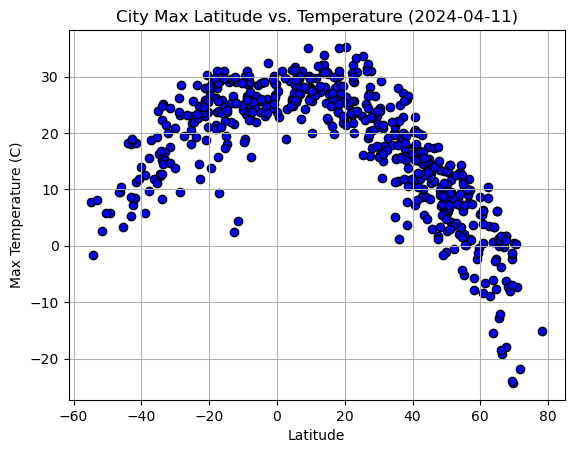

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-04-11)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")
plt.tight_layout

# Show plot
plt.show()

#### Latitude Vs. Humidity

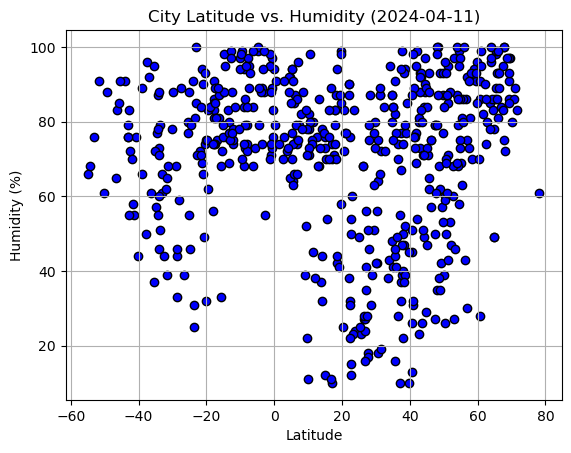

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-04-11)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Incorporate the other graph properties
# Save the figure
plt.savefig("output_data/Fig2.png")
plt.tight_layout

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

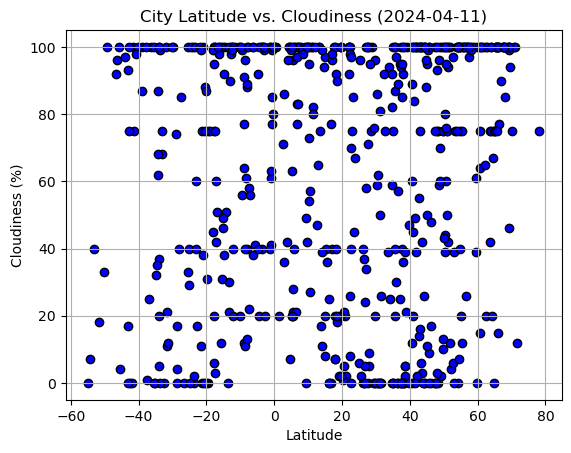

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-04-11)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Incorporate the other graph properties

# Save the figure
plt.savefig("output_data/Fig3.png")
plt.tight_layout

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

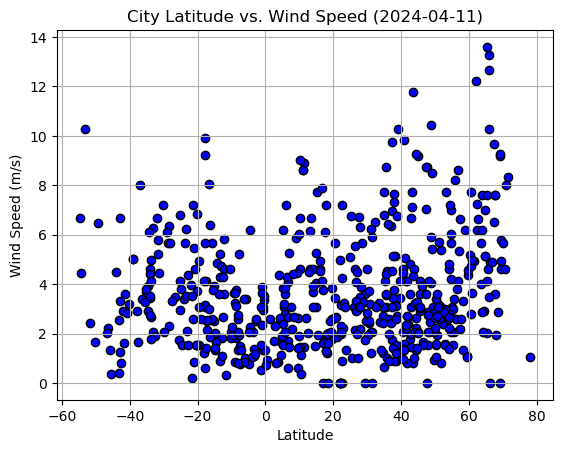

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-04-11)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Incorporate the other graph properties

# Save the figure
plt.savefig("output_data/Fig4.png")
plt.tight_layout

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
line_eq = "y = "+ str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] >=0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,agryz,56.5203,52.9942,7.64,86,26,3.79,RU,1712889345
1,la ronge,55.1001,-105.2842,2.14,69,20,3.09,CA,1712889345
2,hujra shah muqim,30.7418,73.8236,29.23,18,62,3.18,PK,1712889345
3,dalnegorsk,44.5604,135.5701,17.56,88,0,1.34,RU,1712889345
5,albany,42.6001,-73.9662,15.73,80,100,1.79,US,1712889267


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] <0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,kununurra,-15.7667,128.7333,30.99,33,12,5.66,AU,1712889345
10,blackmans bay,-43.0167,147.3167,18.07,76,93,3.32,AU,1712889345
13,adamstown,-25.0660,-130.1015,21.83,55,29,6.78,PN,1712889346
17,edinburgh of the seven seas,-37.0676,-12.3116,18.77,92,25,8.01,SH,1712889346
18,grytviken,-54.2811,-36.5092,-1.63,68,7,4.46,GS,1712889346


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7693180139112137
The r value is: -0.8771077550171437


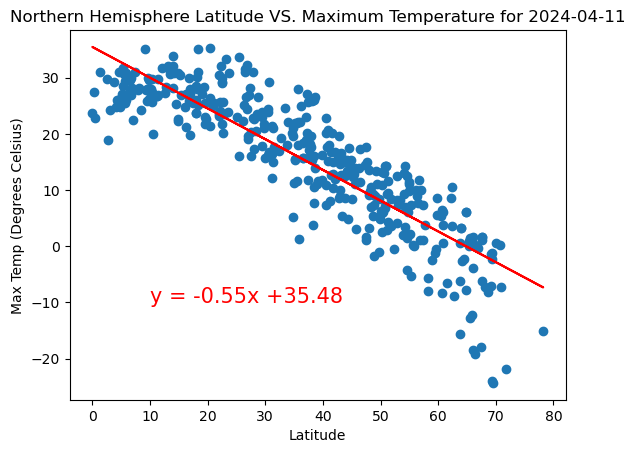

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")
plt.title('Northern Hemisphere Latitude VS. Maximum Temperature for 2024-04-11')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Degrees Celsius)')
plt.tight_layout

print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

The r-squared is: 0.5177948953819704
The r value is: 0.7195796657646535


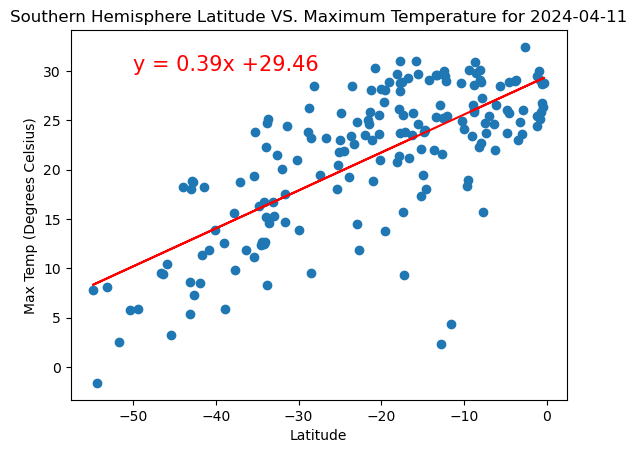

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.title('Southern Hemisphere Latitude VS. Maximum Temperature for 2024-04-11')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Degrees Celsius)')
plt.tight_layout

print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

**Discussion about the linear relationship:** 

Upon more detailed analysis of both Northern and Southern Hemispheres (Latitude) in relation to Maximum temperate, we can observe the following: 

    For the Northern Hemisphere (Latitude) VS. Maximum Temperatures, there is an absolute r value of -0.88, indicating a strong negative correlation (inverse). From this observed correlation, we would expect that as latitude increases in the Northern Hemisphere, we will see a decrease in Maximum temperature. Our data is reasonable in this case, as as we increase in latitude, we approach the North Pole and temperature is expected to decrease at the pole ends. 

    For the Southern Hemisphere (Latitude) VS. Maximum Temperatures, there is an absolute r value of +0.72, indicating a strong positive correlation. We would thus expect that as latitude increases in the Southern Hemisphere, we will see a increase in Maximum temperature. This conclusion is sound as we expect that in the Southern Hemisphere, an increase in latitude is resulting in movement closer to the equator. 

    In both plots, we can see that the data points (visually) are reflective of their r values, as points are congregating along the line of best fit and not scattered too far from that, speaking to the high predictive value of our line of best of fit (as indicated by the strong r-coefficients). 



### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.04000669547721622
The r value is: 0.20001673799263955


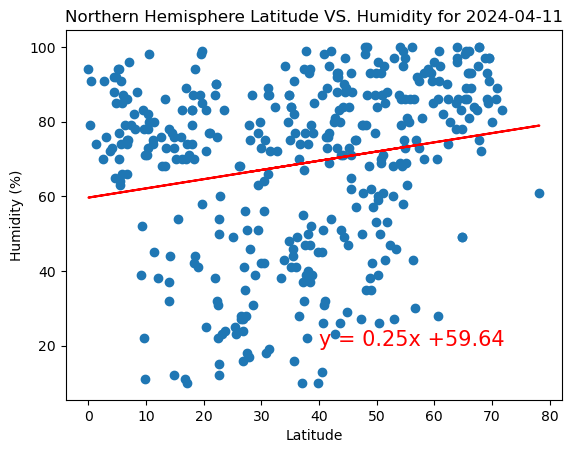

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title('Northern Hemisphere Latitude VS. Humidity for 2024-04-11')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout

print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

The r-squared is: 0.11020291048120744
The r value is: 0.33196823715712237


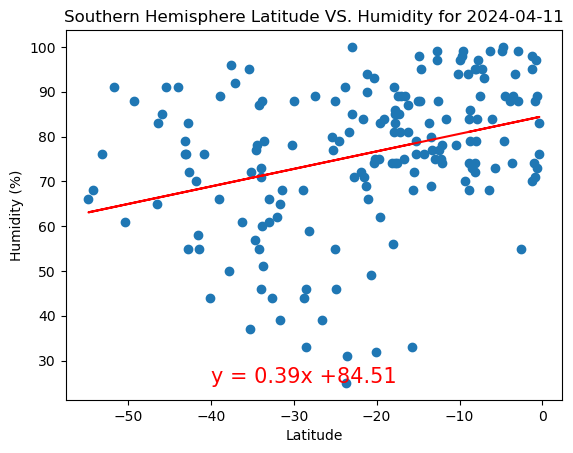

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-40,25),fontsize=15,color="red")
plt.title('Southern Hemisphere Latitude VS. Humidity for 2024-04-11')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout

print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

**Discussion about the linear relationship:** 

Considering Latitude VS Humidity for the Northern and Southern hemispheres separately has shown the following observations: 

    For the Northern Hemisphere, we appreciate a very weak positive correlation between Latitude and Humidity, with an absolute r value of 0.20. This indicates little predictive value in this plot, and as we observe the scattering of the data points, we can see that the overall trend is very weak, with data points not tightly contained or well described by the line of best fit.

    For the Southern Hemisphere, there is a weak positive correlation between Latitude and Humidity as the r value is 0.33. Although predictive value is low for a weak correlation like this, humidity may be better predicted by latitude for the Southern Hemisphere than the Norther hemisphere. Data points are still scattered and not most appropriately described by the line of best fit. 

    We are unlikely to be able to use the line of best fit equations to accurately predict the approximate humidity based on latitude alone. Humidity is a value that is dependent on many variables, including (air) temperature, presence of warm bodies of water nearby and air movement. These variables vary much across land, and cannot be properly predicted by latitudinal location alone. Our data is reasonable given the nature of the variable Humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.01295134045550601
The r value is: 0.11380395623837516


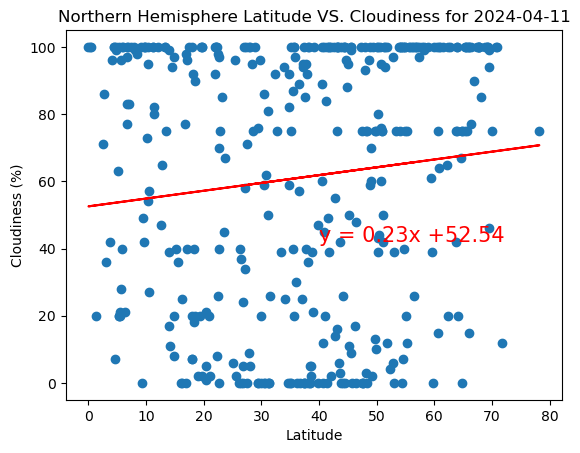

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(40,42),fontsize=15,color="red")
plt.title('Northern Hemisphere Latitude VS. Cloudiness for 2024-04-11')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout

print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

The r-squared is: 0.03515005235317271
The r value is: 0.1874834722133466


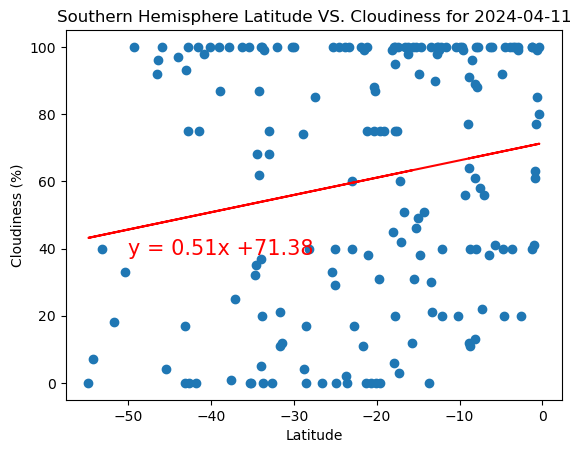

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,38),fontsize=15,color="red")
plt.title('Southern Hemisphere Latitude VS. Cloudiness for 2024-04-11')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout

print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

**Discussion about the linear relationship:** 

Plotting of Cloudiness as a variable against Latitude for both the Northern Hemisphere and the Southern Hemisphere demonstrates low predictive value of the line of best fit, with both plots showing none to very weak correlation, as the Northern Hemisphere plot has an absolute r value of 0.11, and the Southern Hemisphere has an absolute r value of 0.19. These are both none to very weak positive correlations. This would mean that it is very unlikely that we can predict cloudiness percentage based on the latitudinal location. 

Visually, both plots show a high level of scatter, which is reasonable given the nonpromising, very weak correlative relationship between latitude and cloudiness. Considering movement and the many weather conditions that could amount to changes in cloudiness, it is reasonable that it is a variable that is not easily predicted by latitudinal location alone. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.061821608051957966
The r value is: 0.248639514261024


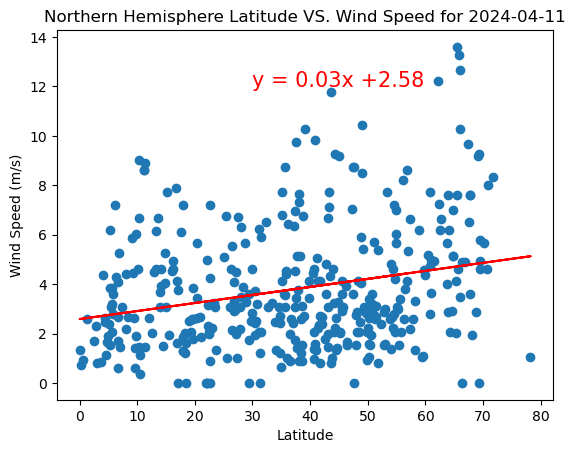

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(30,12),fontsize=15,color="red")
plt.title('Northern Hemisphere Latitude VS. Wind Speed for 2024-04-11')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.tight_layout

print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

The r-squared is: 0.06105129780784759
The r value is: -0.24708560825723458


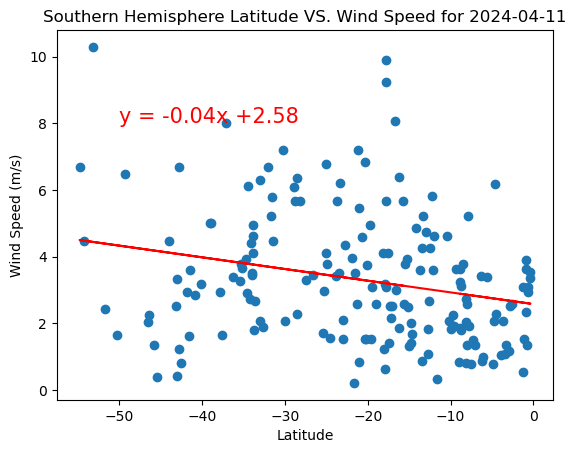

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")
plt.title('Southern Hemisphere Latitude VS. Wind Speed for 2024-04-11')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.tight_layout

print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

**Discussion about the linear relationship:**

To investigate the relationship between wind speed and latitude, I analyzed the following: 

    For the Northern Hemisphere, we see a very weak positive correlation between latitude and wind speed as the absolute r value is 0.25. The linear line of best fit does not describe this data very suitably. Using this equation can not reliably allow for us to predict wind speed based on latitude. However, visual inspection of the graph demonstrates a rather grouped scattering of data points towards the bottom of the graph across all latitudes. This raises the question as to whether wind speed is affected by location, or if there is a more popular range by which wind speed stays within. 

    Similarily, we see very weak correlation between latitude and wind speed at the Southern Hemisphere, although the relationship is inverse (or negative) with an absolute r value of -0.25. This would mean that we are more likely to expect dropping of wind speed as we move higher in latitude. Considering that this is moving towards the rather warm equator, lesser wind does appear more reasonable, logically. 

    However, considering the many physical factors affecting wind speed, it is not difficult to admit that predictions of it simply cannot be very accurate using only one variable, and that being latitude. 
